

# Project: Investigate a 'No_Show_ Appointment Dataset!'

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. A number of
characteristics about the patient are
included in each row.


● ***‘ScheduledDay’*** tells us on
what day the patient set up their
appointment.

● **‘Neighborhood’** indicates the
location of the hospital.

● **‘Scholarship’** indicates
whether or not the patient is
enrolled in Brasilian welfare
program Bolsa Família.

<h3> Description about the Dataset:- </h3>
This data set was obtained from <b><i>Kaggle</i></b> and it can be downloaded from <a href="https://www.kaggle.com/joniarroba/noshowappointments">Here</a>

***there are Questions we need answers for:-***

1- what is  the Number of Male and Females who showed up for the Appointment ?

2- What is their Average of the numbers above and their propotion comparing to the Main population  of the dataset?

3- How many SMS were received and the Relation between it and the Population that Appeared to Appointment and Who didn't also ?

4- the Neighbourhood the place where a hospital is located what is the highest occupied Hospital by patients who showed up ?

5- how many patient with chronic diseas such as hypertension and diabetes showed up comparing to the others who didn't show up ?



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

<a id='wrangling'></a>
## Data Wrangling

> In this section we will check the integrity  of the Dataset by assessing it and checking for errors/ missing data!
### General Properties

In [2]:
#checking the first couple of rows in the dataset to get a peak inisde it

df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
#checking the number of rows and columns in the dataset!
df.shape

(110527, 14)

In [4]:
#checking for null/missing data
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [5]:
#checking the info of the entire dataset!
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
#checking for duplicates
df.duplicated().sum()

0

In [7]:
#getting a statistical report about the dataset!
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Discussing the Data Wrangling results:
 The Data set contains <b> No Null/Missing Values </b>
 
 The Data set has <b> No Duplicated Rows / columns </b>
 
 ### Observations on Data Wrangling part :-
 1- we can notice that the Average Age for this Data set is <b>37 Years</b> and the Range of the Age is between <b> 18 o 55 </b>
 
 2- we do notice that Age min is <b> (-1) </b> Which is unreal , it will be corrected in the cleaning phase!



### Data Cleaning (Replace this with more specific notes!)

In [8]:
#correcting a name of a column from 'hipertension' to 'hypertension'
# Adjusting the name from 'No-show' to 'No_show'
df.rename(columns={'Hipertension' : 'Hypertension'}, inplace =True)

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [9]:
#investigating the Min Age (-1)
df[df['Age'] == -1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [10]:
#replacing the -1 Age with the Average Age of the dataset
df.Age = df.Age.replace(-1,df.Age.mean()).astype(int)

In [11]:
#checking if the correction went through and obtained the new value!
df[df.AppointmentID == 5775010]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,37,ROMÃO,0,0,0,0,0,0,No


In [12]:
#dropping columns PatientId, appointmentID, ScheduledDay, and appointmentDay
df.drop(columns=['PatientId','AppointmentID','ScheduledDay','AppointmentDay'], inplace=True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [13]:
df.rename(columns=lambda x: x.replace('-','_'),inplace=True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Discussing the Data Cleaning results:

1- Correcting columns name from Hipertension to Hypertension. and adjust the No-show to be No_show.

2- Replacing the Age -1 with the average Age of the Data set.

3- Removing columsn we think it's not useful in analysis process.

<a id='eda'></a>
## Exploratory Data Analysis

In this Step we made sure that the Quality of the Data is well enough and Ready for the Exploratory Data Analysis.

We will start to dive deeper into the Data set to find answers for some Questions to have better understanding.

In [14]:
#first part we need to divide the database into 2 databases 
# show and no_show databases to get deeper insight

show = df.query('No_show == "No"')
no_show = df.query('No_show == "Yes"')

In [15]:
#checking the show data base!
show.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [16]:
#checking the No_show Data base!
no_show.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
6,F,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,F,39,GOIABEIRAS,0,0,0,0,0,0,Yes
11,M,29,NOVA PALESTINA,0,0,0,0,0,1,Yes
17,F,40,CONQUISTA,1,0,0,0,0,0,Yes
20,F,30,NOVA PALESTINA,0,0,0,0,0,0,Yes


In [17]:
show.describe()  #checking statistics of the show database

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received
count,88208.000000,88208.000000,88208.000000,88208.000000,88208.000000,88208.000000,88208.000000
mean,37.790495,0.093903,0.204392,0.073837,0.030417,0.022742,0.291334
std,23.338513,0.291695,0.403259,0.261507,0.171732,0.162750,0.454380
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


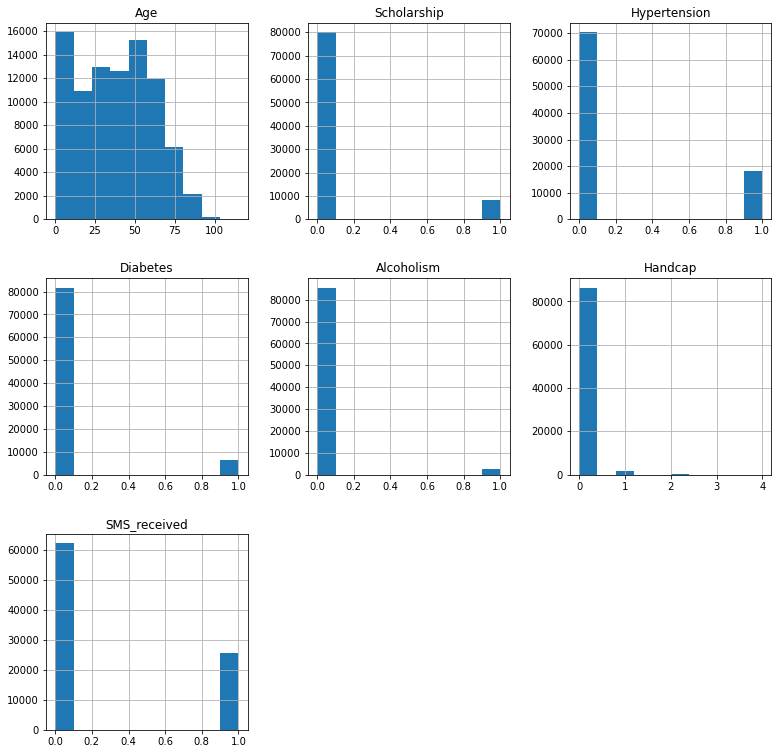

In [18]:
show.hist(figsize=(13,13));  # Visualizing the show data to get deeper insight!

In [19]:
no_show.describe()  #statistics of the no_show database!      

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received
count,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000
mean,34.317667,0.115507,0.169004,0.064071,0.030333,0.020297,0.438371
std,21.965941,0.319640,0.374764,0.244885,0.171505,0.156670,0.496198
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


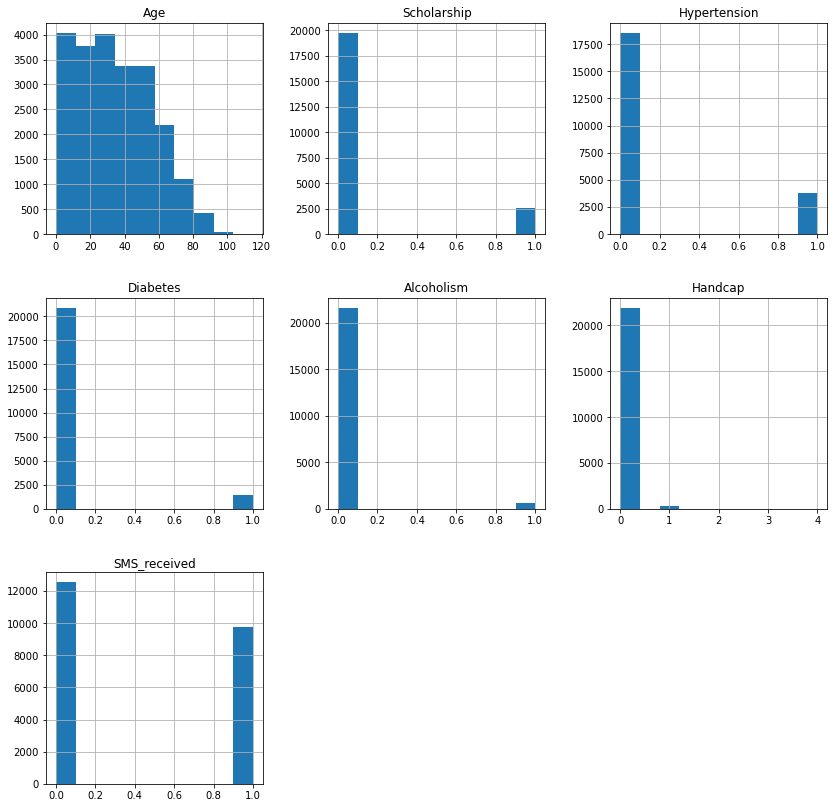

In [20]:
no_show.hist(figsize=(14,14)); #visualizing the no_show database!

In [21]:
show.shape, no_show.shape

((88208, 10), (22319, 10))

In [22]:
show.index.nunique() / no_show.index.nunique()   #numbers of showed almost 4X number of No_show!

3.9521483937452393

###### Disccusion of so-far EDA.
1st We Divided the Data Set into <b> two datasets </b> to get a better understanding of the data.

2nd  We Do notice that the <b>Number of Patients showed for their Appointments are Approx. 4x the number of patients who didn't show up!.</b>

3rd we can clearly notice that the Average Age for the Patients who Showed up is 37.  While the Average Age for who didn't show up is 34.

##  Q1.WHAT IS THE NUMBER OF FEMALES AND MALES WHO ATTEND THE APPOINTMENT AND THEIR AVERAGE AGE! ?


In [23]:
females = show.query('Gender == "F"')
males = show.query('Gender == "M"')
males.Age.mean(),females.Age.mean()     #Average Age for Females is higher than average of Males

(34.46137200439248, 39.59108059951787)

In [24]:
females.Age.count(), males.Age.count()  #the Number of Attending Females to the appointments are higher than Males.

(57246, 30962)

''

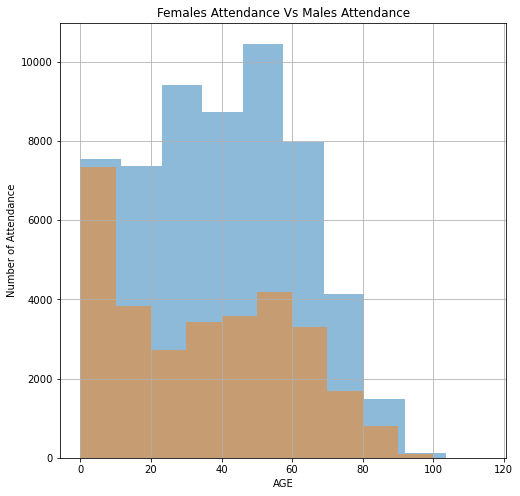

In [25]:
females.Age.hist(figsize=(8,8), alpha = 0.5),males.Age.hist(figsize=(8,8), alpha =0.5)
plt.xlabel('AGE'),
plt.ylabel('Number of Attendance')
plt.title("Females Attendance Vs Males Attendance")
;

## Q1.2 WHAT IS THE NUMBER OF FEMALES AND MALES WHO WERE ABSENT AND THEIR AVERAGE AGE ?

In [26]:
F = no_show.query('Gender == "F"')
M = no_show.query('Gender == "M"')

In [27]:
F.Age.count(), M.Age.count() # number of females who didn't attend is higher than males.


(14594, 7725)

In [28]:
F.Age.mean(), M.Age.mean() # the Average Age of females who didn't attend is 36 years and males 30 years!

(36.162189941071674, 30.833009708737865)

''

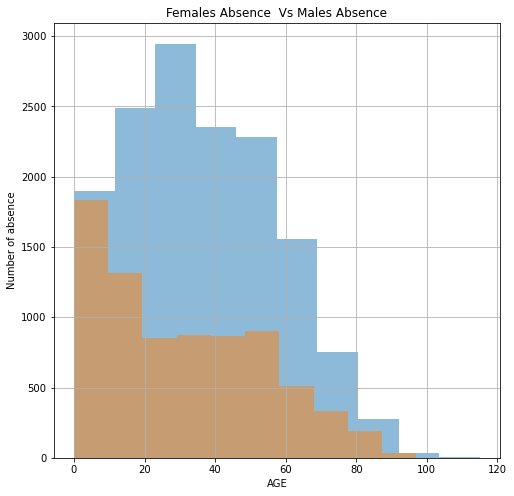

In [29]:
F.Age.hist(figsize=(8,8), alpha = 0.5),M.Age.hist(figsize=(8,8), alpha =0.5)
plt.xlabel('AGE'),
plt.ylabel('Number of absence')
plt.title("Females Absence  Vs Males Absence")
;

### Q3. WHAT IS THE  GENEDER DISTRIBUTION TO THIS THE DATA SET ?

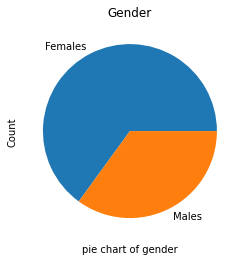

In [30]:
df.Gender.value_counts().plot(kind="pie",labels=["Females","Males"])
plt.ylabel("Count")
plt.xlabel("pie chart of gender")
plt.title("Gender");

In this Data set in General we can notice that the size of Females are the bigger porition

### Q4. HOW MANY SMS WERE SENT  IN TOTAL ? AND HOW MANY SMS WERE SENT TO THE GROUP WHO SHOWED UP ?

In [31]:
df['SMS_received'].value_counts(),show['SMS_received'].value_counts(),no_show['SMS_received'].value_counts()
#checking the # of SMS was sent  0= Not receieved  1= received
# 3 Data sets.. the Main one, and the 'show' dataset, Finally the 'no_show' Dataset consecutively!

(0    75045
 1    35482
 Name: SMS_received, dtype: int64,
 0    62510
 1    25698
 Name: SMS_received, dtype: int64,
 0    12535
 1     9784
 Name: SMS_received, dtype: int64)

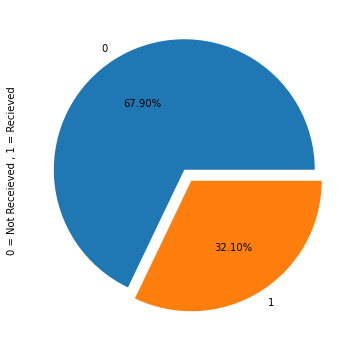

In [32]:
df['SMS_received'].value_counts().plot(kind = 'pie', figsize =(6,6),autopct='%.2f%%', label ='0 = Not Receieved , 1 = Recieved', explode = (0,0.1));

we can Notice from the Pie Chart and the analysis above it. that The majority of the Data set did NOT received any SMS.

And the Majority of Who Showed up Actually Received a SMS  as in the Hist.figure below

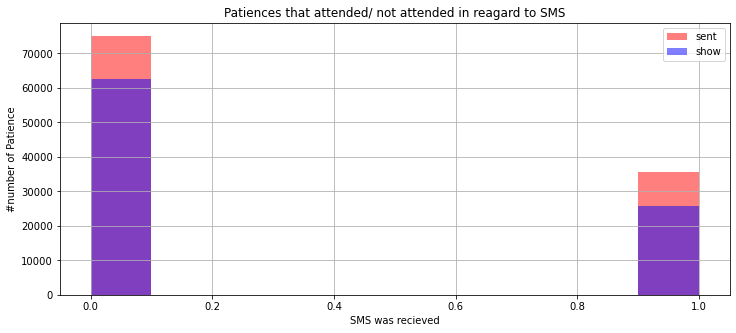

In [33]:
plt.figure(figsize=[12,5])


df.SMS_received.hist(label='sent', color = 'red', alpha = 0.5)
show.SMS_received.hist(label='show', color = 'blue', alpha=0.5)
plt.xlabel('SMS was recieved')
plt.ylabel('#number of Patience')
plt.title('Patiences that attended/ not attended in reagard to SMS')
plt.legend();

This relationship between the entire Dataset and the 'Show' Data set..

It shows that the patients who showed up Did Recieved a SMS

##  Q5 . Which area is consider the highest in # of patients showed/ No_showed ?

In [34]:
 df['Neighbourhood'].value_counts(),
# we can find the "Jardim Camburi is the area where majority of patients."

(JARDIM CAMBURI                 7717
 MARIA ORTIZ                    5805
 RESISTÊNCIA                    4431
 JARDIM DA PENHA                3877
 ITARARÉ                        3514
                                ... 
 ILHA DO BOI                      35
 ILHA DO FRADE                    10
 AEROPORTO                         8
 ILHAS OCEÂNICAS DE TRINDADE       2
 PARQUE INDUSTRIAL                 1
 Name: Neighbourhood, Length: 81, dtype: int64,)

In [35]:
show['Neighbourhood'].value_counts()  #JARDIM CAMBURI highest patients showed up for the appointments

JARDIM CAMBURI       6252
MARIA ORTIZ          4586
RESISTÊNCIA          3525
JARDIM DA PENHA      3246
SANTA MARTHA         2635
                     ... 
PONTAL DE CAMBURI      57
ILHA DO BOI            32
ILHA DO FRADE           8
AEROPORTO               7
PARQUE INDUSTRIAL       1
Name: Neighbourhood, Length: 80, dtype: int64

#JARDIM CAMBURI highest patients showed up for the appointments

In [36]:
no_show['Neighbourhood'].value_counts() 

JARDIM CAMBURI                 1465
MARIA ORTIZ                    1219
ITARARÉ                         923
RESISTÊNCIA                     906
CENTRO                          703
                               ... 
PONTAL DE CAMBURI                12
ILHA DO BOI                       3
ILHAS OCEÂNICAS DE TRINDADE       2
ILHA DO FRADE                     2
AEROPORTO                         1
Name: Neighbourhood, Length: 80, dtype: int64

JARDIM CAMBURI highest patients Didn't show up for the appointment and it is presented by the graph below.

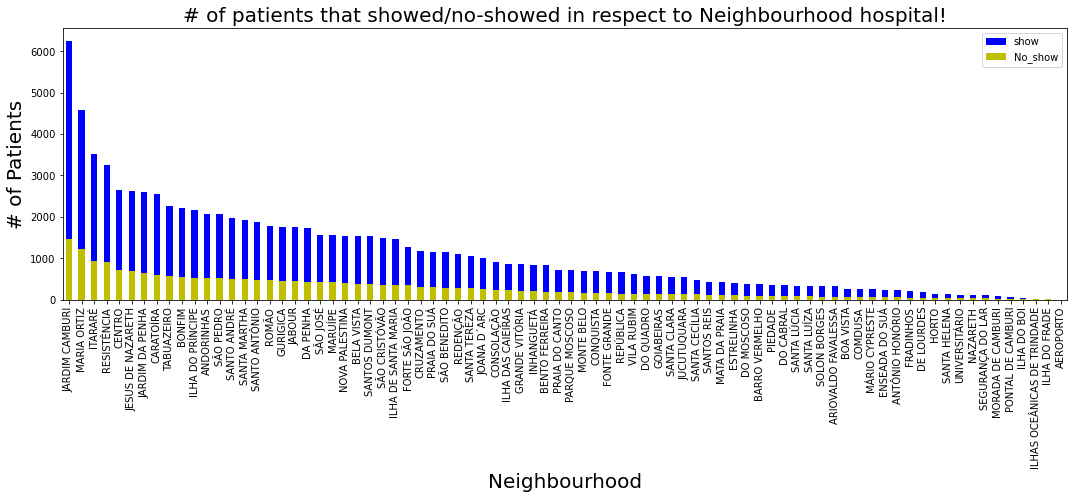

In [37]:
plt.figure(figsize=(18,5))
show['Neighbourhood'].value_counts().plot(kind='bar', color = 'b', label = 'show')
no_show['Neighbourhood'].value_counts().plot(kind='bar', color = 'y', label = 'No_show')
plt.xlabel('Neighbourhood', fontdict={'fontsize' :20})
plt.ylabel('# of Patients',fontdict={'fontsize' :20})
plt.title('# of patients that showed/no-showed in respect to Neighbourhood hospital!',fontdict={'fontsize' :20})
plt.legend();

we can notice JARDIM CAMBURI  is the area with the highest amount of patients that Showed up and Highest # of patients that didn't show up

### Q6. # Number of people Who have Diabetes and showed up compared to those who didn't ?

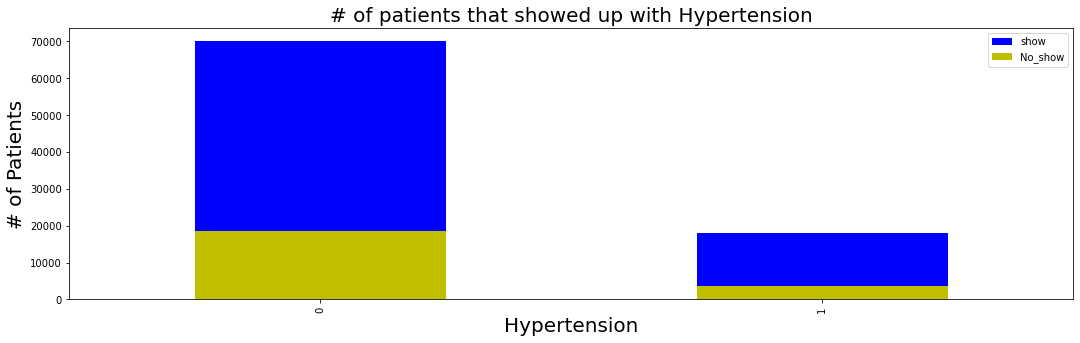

In [38]:
plt.figure(figsize=(18,5))
show['Hypertension'].value_counts().plot(kind='bar', color = 'b', label = 'show')
no_show['Hypertension'].value_counts().plot(kind='bar', color = 'y', label = 'No_show')
plt.xlabel('Hypertension', fontdict={'fontsize' :20})
plt.ylabel('# of Patients', fontdict={'fontsize' :20})
plt.title('# of patients that showed up with Hypertension', fontdict={'fontsize' :20})
plt.legend();

We can notice that People With Hypertension showed up  3x more than who didn't show up!

### Q7. # Number of people Who have Diabetes and showed up compared to those who didn't ?

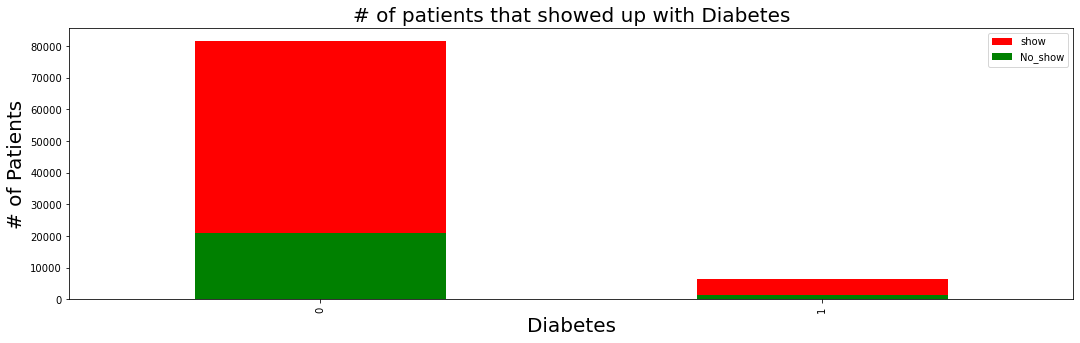

In [39]:
plt.figure(figsize=(18,5))
show['Diabetes'].value_counts().plot(kind='bar', color = 'r', label = 'show')
no_show['Diabetes'].value_counts().plot(kind='bar', color = 'g', label = 'No_show')
plt.xlabel('Diabetes', fontdict={'fontsize' :20})
plt.ylabel('# of Patients', fontdict={'fontsize' :20})
plt.title('# of patients that showed up with Diabetes', fontdict={'fontsize' :20})
plt.legend();

we can also notice the patients with Diabetes showed up 4x more than othe ones who didn't show!

<a id='conclusions'></a>
## Conclusions

We can Notice that the number of Females who attend the Appointments are higher than the number of Males
Also the number of Females who Missed their Appointments are higher than males.

we did found that there is a Neighbourhood "Jardim Camburi" has the highest number of Show and No show. this could be due to it's population or other factors

the Majority of the patients didn't recieved a SMS, and the majority of whoever showed up Did received it.


 We Do notice that the Number of Patients showed for their Appointments are Approx. 4x the number of patients who didn't show up!.

3rd we can clearly notice that the Average Age for the Patients who Showed up is 37. While the Average Age for who didn't show up is 34.

JARDIM CAMBURI is a the highest Nighbourhood that has patients showed up, and patients who did not show up also. that could be due to the population Density or other factors.

We did find out that the # of patients with chronic Diseases like ( 'HyperTension' and 'Diabetes')  Tend to show up 

 ## limitations:-
 
 1-we don't have population size for each neighbourhood to assess if the numbers of  JARDIM CAMBURI is consider higher than the normal or not.
 
 2- we did found entry of Age that is (-1)  which affected the statistical analysis.
 
